<a href="https://colab.research.google.com/github/markrubin85/CP_Counterfeit_Detection/blob/main/Banknote_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive, auth
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.wrappers import scikit_learn
from tensorflow.keras.callbacks import EarlyStopping

import torchvision.models as models
resnet18 = models.resnet18()
alexnet = models.alexnet()
squeezenet = models.squeezenet1_0()
inception = models.inception_v3()

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from oauth2client.client import GoogleCredentials

/usr/local/lib/python3.7/dist-packages/torchvision/models/inception.py:82: FutureWarning: The default weight initialization of inception_v3 will be changed in future releases of torchvision. If you wish to keep the old behavior (which leads to long initialization times due to scipy/scipy#11299), please set init_weights=True.
  ' due to scipy/scipy#11299), please set init_weights=True.', FutureWarning)


In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
fid = drive.ListFile({'q':"title= 'CapStone_COP_Banknote_Data.zip'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('CapStone_COP_Banknote_Data.zip')

In [ ]:
!unzip CapStone_COP_Banknote_Data.zip

In [ ]:
ds1_train = tf.keras.preprocessing.image_dataset_from_directory('/content/COP_banknote/ds1/Train', labels='inferred', image_size=(224,224))
ds1_test = tf.keras.preprocessing.image_dataset_from_directory('/content/COP_banknote/ds1/Test', labels='inferred', image_size=(224,224))
ds1_validation = tf.keras.preprocessing.image_dataset_from_directory('/content/COP_banknote/ds1/Validation', labels='inferred', image_size=(224,224))


Found 4368 files belonging to 13 classes.
Found 1456 files belonging to 13 classes.
Found 1456 files belonging to 13 classes.


In [ ]:
print(ds1_train.class_names)
print(ds1_test.class_names)
ds1_train.class_names == ds1_test.class_names == ds1_validation.class_names

['100k', '100kf', '10k', '10kf', '20k', '20kf', '2k', '2kf', '50k', '50kf', '5k', '5kf', 'Background']
['100k', '100kf', '10k', '10kf', '20k', '20kf', '2k', '2kf', '50k', '50kf', '5k', '5kf', 'Background']


True

In [ ]:
ds1_train_labels = ds1_train.class_names
ds1_test_labels = ds1_test.class_names
ds1_validation_labels = ds1_validation.class_names

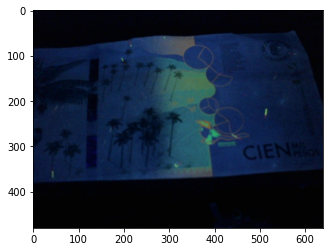

In [ ]:
image = plt.imread('/content/COP_banknote/ds1/Train/100k/100.jpg')
plt.imshow(image)

In [ ]:
image.shape

(480, 640, 3)

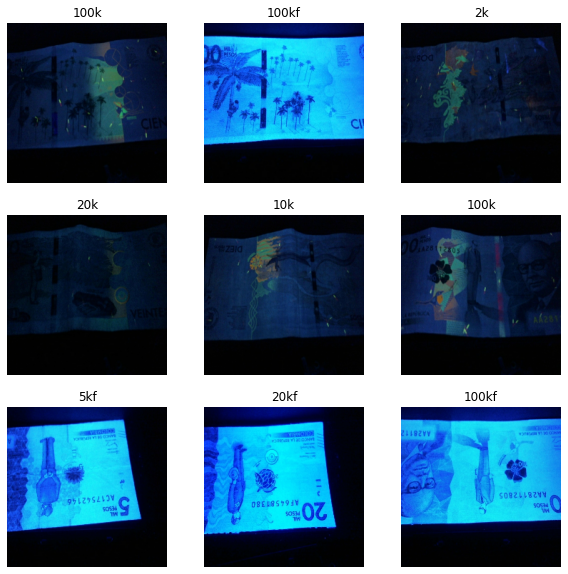

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in ds1_train.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(ds1_train_labels[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in ds1_train:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


In [ ]:
for image_batch, labels_batch in ds1_test:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


In [ ]:
num_classes = 13

custom_model = Sequential([                     
  Conv2D(64, 11, strides=4, padding='same', activation='relu', input_shape=(224, 224, 3)),
  MaxPooling2D(3, strides=2, padding='valid'),
  Conv2D(192, 5, strides=1, padding='same', activation='relu'),
  MaxPooling2D(3, strides=2, padding='valid'),
  Conv2D(384, 3, strides=1, padding='same', activation='relu'),
  Conv2D(256, 3, strides=1, padding='same', activation='relu'),
  Conv2D(256, 3, strides=1, padding='same', activation='relu'),
  MaxPooling2D(3, strides=2, padding='valid'),
  Flatten(),
  Dropout(.5),
  Dense(512, activation=None),
  Dropout(.5),
  Dense(512, activation=None),
  Dense(num_classes, activation='softmax')
])

In [ ]:
custom_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 56, 56, 64)        23296     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 192)       307392    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 192)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 384)       663936    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 256)       884992    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 256)       5

In [ ]:
custom_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
custom_model.fit(ds1_train, epochs=15)

Epoch 1/10
137/137 [==============================] - 397s 3s/step - loss: 14.1471 - accuracy: 0.1324
Epoch 2/10
137/137 [==============================] - 397s 3s/step - loss: 1.7678 - accuracy: 0.2931
Epoch 3/10
137/137 [==============================] - 395s 3s/step - loss: 1.4159 - accuracy: 0.4369
Epoch 4/10
137/137 [==============================] - 395s 3s/step - loss: 1.0965 - accuracy: 0.5759
Epoch 5/10
137/137 [==============================] - 389s 3s/step - loss: 0.8576 - accuracy: 0.6820
Epoch 6/10
137/137 [==============================] - 404s 3s/step - loss: 1.5916 - accuracy: 0.4910
Epoch 7/10
137/137 [==============================] - 466s 3s/step - loss: 0.6833 - accuracy: 0.7639
Epoch 8/10
137/137 [==============================] - 432s 3s/step - loss: 0.4009 - accuracy: 0.8554
Epoch 9/10
137/137 [==============================] - 421s 3s/step - loss: 0.3335 - accuracy: 0.8880
Epoch 10/10
137/137 [==============================] - 404s 3s/step - loss: 0.2872 - accur

In [ ]:
test_loss, test_acc = custom_model.evaluate(ds1_test)

46/46 [==============================] - 5s 88ms/step - loss: 0.1541 - accuracy: 0.9526


In [ ]:
print(test_acc)

0.9526098966598511


# New Section